# Question 3

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import copy
import time

In [2]:
root = './A2_resources/'

In [3]:
def read(path, arg = cv2.IMREAD_UNCHANGED):
    args = {'gray' : cv2.IMREAD_GRAYSCALE, 'unchanged' : cv2.IMREAD_UNCHANGED, 'color' : cv2.IMREAD_COLOR}
    return cv2.imread(path, args[arg])

In [4]:
def strided(img, kernel):
    img = img.astype('float32')
    img = np.pad(img, (np.int16((kernel.shape[0]-1)/2), np.int16((kernel.shape[1]-1)/2)), 'reflect')
    expanded_input = np.lib.stride_tricks.as_strided(
    img,
    shape=(
        img.shape[0] - kernel.shape[0] + 1,
        img.shape[1] - kernel.shape[1] + 1,
        kernel.shape[0],
        kernel.shape[1],
    ),
    strides=(
        img.strides[0],
        img.strides[1],
        img.strides[0],
        img.strides[1],
    )
)
    return expanded_input

In [5]:
def conv2d(img, kernel):

    channels = 1
    if len(img.shape) > 2:
        channels = img.shape[2]

    if channels == 1:
        return np.tensordot(strided(img, kernel), kernel)
    else:
        res = np.tensordot(strided(img[:,:,0], kernel), kernel)
        for i in range(1,channels):
            res = np.dstack((res, np.tensordot(strided(img[:,:,i], kernel), kernel)))
        return res

In [6]:
def applyFilter(img, kernel, layers = 1):
    res = np.power(conv2d(img, kernel[0]),2)
    for i in range(1,layers):
        res = res + np.power(conv2d(img, kernel[i]),2)
    return np.uint8(np.round(np.power(res, 0.5)))

## Part 1
> For detecting horizontal edges $sobel y$ filter is used

In [7]:
im = read(root+'box.png', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [8]:
kernel = np.asarray([[1,2,1],[0,0,0],[-1,-2,-1]])

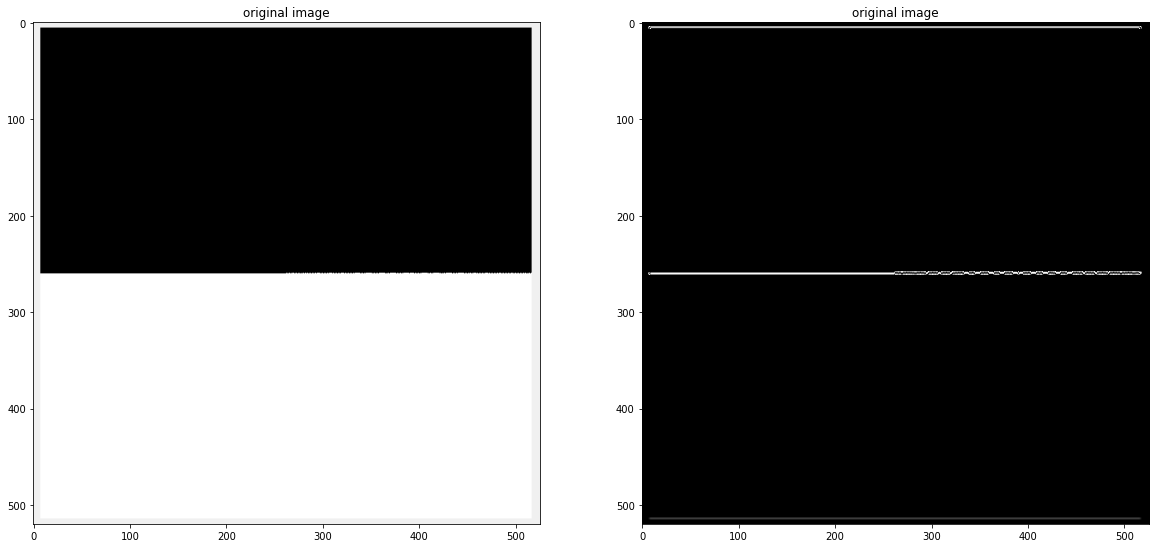

In [9]:
out = np.uint8(np.abs(conv2d(im,kernel)))
_,plots = plt.subplots(1,2,figsize = (20,20))
plots[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
plots[0].set_title('original image')
plots[1].imshow(out, cmap = 'gray', vmin = 0, vmax = 255)
plots[1].set_title('original image')
plt.show()

## Part 2
> Since we are using sobel y filter so its transpose is sobel x which detects vertical edges

In [10]:
im = read(root+'blur.jpg', 'color')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

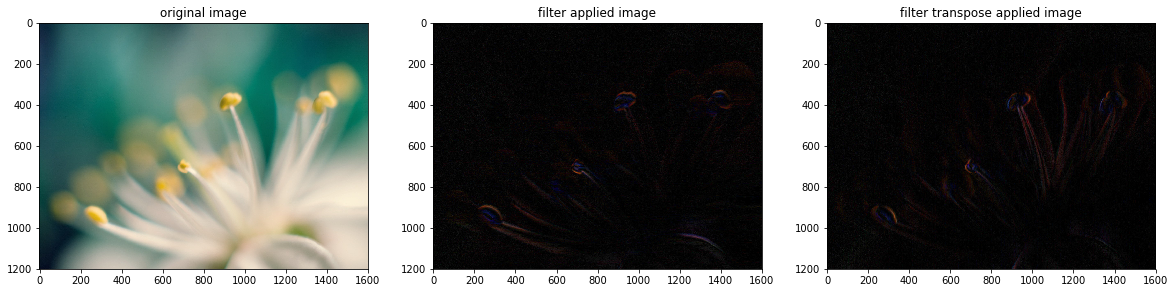

In [11]:
out = np.uint8(np.abs(conv2d(im,kernel.T)))
out2 = np.uint8(np.abs(conv2d(im,kernel)))

_,plots = plt.subplots(1,3,figsize = (20,20))
plots[0].imshow(im)
plots[0].set_title('original image')
plots[1].imshow(out2)
plots[1].set_title('filter applied image')
plots[2].imshow(out)
plots[2].set_title('filter transpose applied image')
plt.show()

## Part 3

In [12]:
im = read(root+'sobel.jpg', 'gray')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

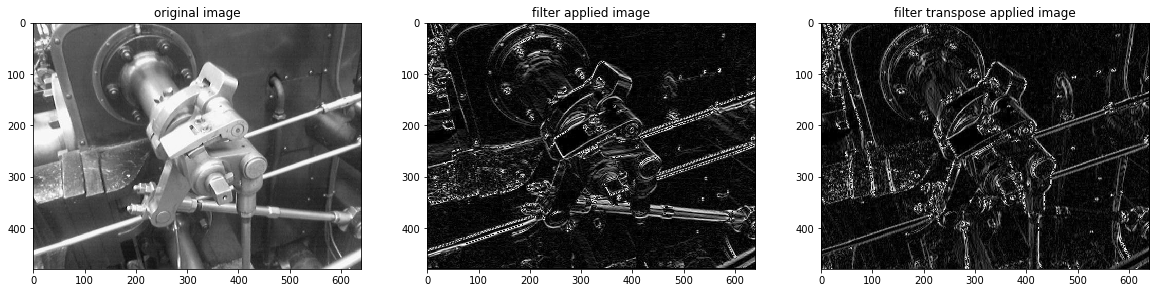

In [13]:
out = np.uint8(np.abs(conv2d(im,kernel.T)))
out2 = np.uint8(np.abs(conv2d(im,kernel)))

_,plots = plt.subplots(1,3,figsize = (20,20))
plots[0].imshow(im)
plots[0].set_title('original image')
plots[1].imshow(out2)
plots[1].set_title('filter applied image')
plots[2].imshow(out)
plots[2].set_title('filter transpose applied image')
plt.show()

In [14]:
im = read(root+'q4.jpg', 'gray')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

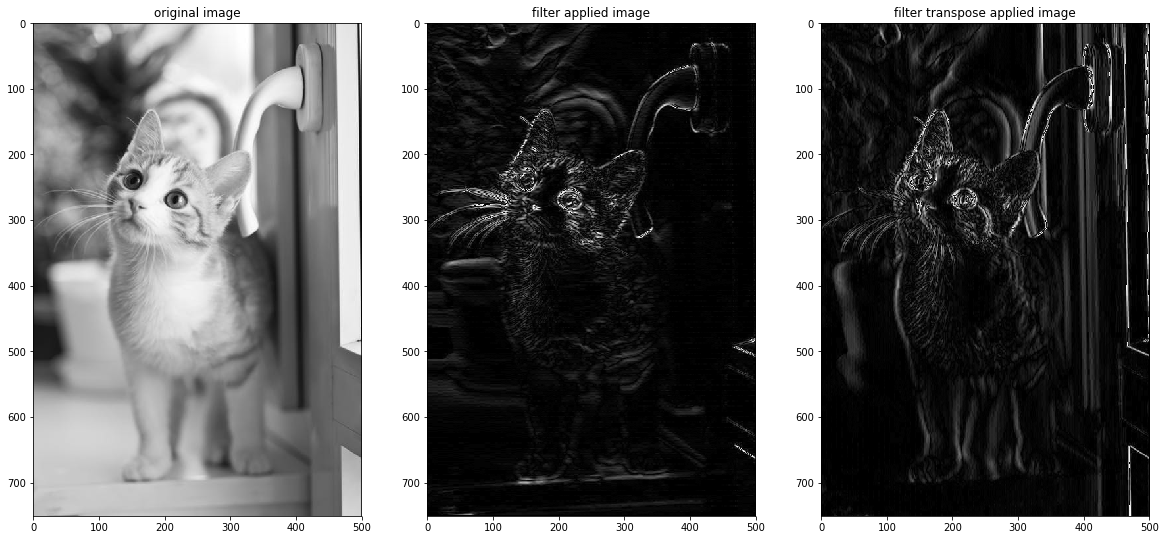

In [15]:
out = np.uint8(np.abs(conv2d(im,kernel.T)))
out2 = np.uint8(np.abs(conv2d(im,kernel)))

_,plots = plt.subplots(1,3,figsize = (20,20))
plots[0].imshow(im)
plots[0].set_title('original image')
plots[1].imshow(out2)
plots[1].set_title('filter applied image')
plots[2].imshow(out)
plots[2].set_title('filter transpose applied image')
plt.show()